In [2]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
import sklearn.metrics as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=load_iris()

In [6]:
X=pd.DataFrame(data.data)

In [8]:
X.columns=['Sepal_length','Sepal_width','Petal_length','Petal_width']

In [11]:
X.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
y=pd.DataFrame(data.target)

In [10]:
y.columns=['Target']

In [12]:
y.head()

,Target
0,0
1,0
2,0
3,0
4,0


In [13]:
cmap=np.array(['red','green','lime'])

E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'GMM Classification')

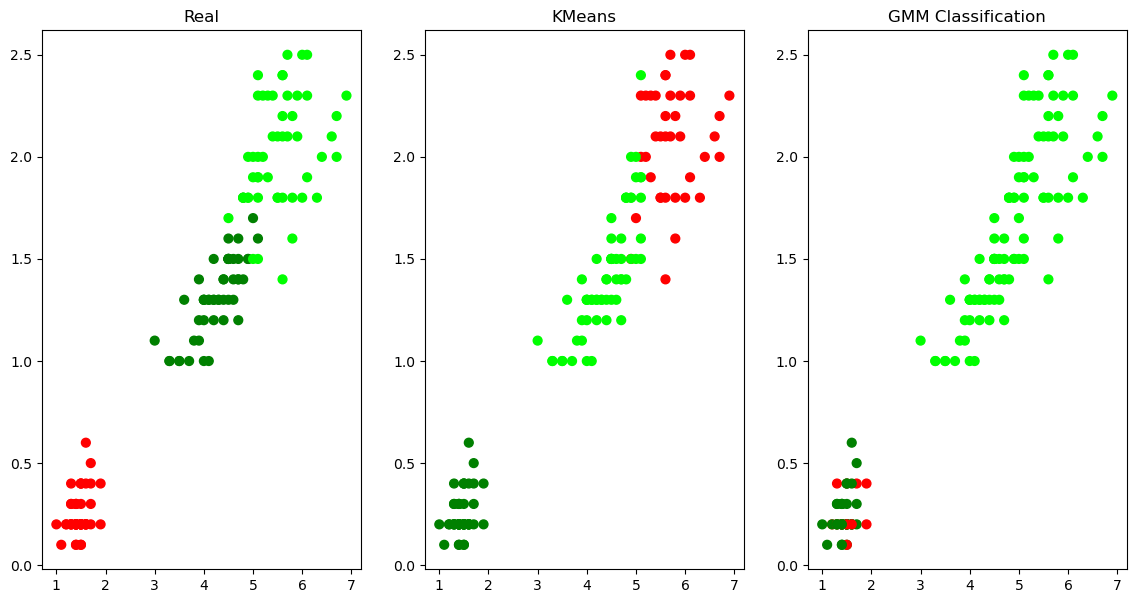

In [23]:
plt.figure(figsize=(14,7))



plt.subplot(1,3,1)
plt.scatter(X.Petal_length, X.Petal_width, c=cmap[y.Target], s=40)
plt.title("Real")



plt.subplot(1,3,2)
model=KMeans(n_clusters=3)
model.fit(X)
y_pred=np.choose(model.labels_,[0,1,2]).astype(np.int64)
plt.scatter(X.Petal_length,X.Petal_width,c=cmap[y_pred],s=40)
plt.title('KMeans')



scaler=preprocessing.StandardScaler()
scaler.fit(X)
xsa=scaler.transform(X)
xs=pd.DataFrame(xsa, columns=X.columns)

gmm=GaussianMixture(n_components=3)
gmm.fit(xs)
y_cluster_gmm=gmm.predict(xs)



plt.subplot(1,3,3)
plt.scatter(X.Petal_length, X.Petal_width, c=cmap[y_cluster_gmm], s=40)
plt.title("GMM Classification")